In [61]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [62]:
data=[[[i+j] for i in range(5)] for j in range(100)]
target=[(i+5) for i in range(100)]

In [63]:
data

[[[0], [1], [2], [3], [4]],
 [[1], [2], [3], [4], [5]],
 [[2], [3], [4], [5], [6]],
 [[3], [4], [5], [6], [7]],
 [[4], [5], [6], [7], [8]],
 [[5], [6], [7], [8], [9]],
 [[6], [7], [8], [9], [10]],
 [[7], [8], [9], [10], [11]],
 [[8], [9], [10], [11], [12]],
 [[9], [10], [11], [12], [13]],
 [[10], [11], [12], [13], [14]],
 [[11], [12], [13], [14], [15]],
 [[12], [13], [14], [15], [16]],
 [[13], [14], [15], [16], [17]],
 [[14], [15], [16], [17], [18]],
 [[15], [16], [17], [18], [19]],
 [[16], [17], [18], [19], [20]],
 [[17], [18], [19], [20], [21]],
 [[18], [19], [20], [21], [22]],
 [[19], [20], [21], [22], [23]],
 [[20], [21], [22], [23], [24]],
 [[21], [22], [23], [24], [25]],
 [[22], [23], [24], [25], [26]],
 [[23], [24], [25], [26], [27]],
 [[24], [25], [26], [27], [28]],
 [[25], [26], [27], [28], [29]],
 [[26], [27], [28], [29], [30]],
 [[27], [28], [29], [30], [31]],
 [[28], [29], [30], [31], [32]],
 [[29], [30], [31], [32], [33]],
 [[30], [31], [32], [33], [34]],
 [[31], [32], [33

In [64]:
target

[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104]

In [65]:
data=[[[(i+j)/100] for i in range(5)] for j in range(100)]
data

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]],
 [[0.05], [0.06], [0.07], [0.08], [0.09]],
 [[0.06], [0.07], [0.08], [0.09], [0.1]],
 [[0.07], [0.08], [0.09], [0.1], [0.11]],
 [[0.08], [0.09], [0.1], [0.11], [0.12]],
 [[0.09], [0.1], [0.11], [0.12], [0.13]],
 [[0.1], [0.11], [0.12], [0.13], [0.14]],
 [[0.11], [0.12], [0.13], [0.14], [0.15]],
 [[0.12], [0.13], [0.14], [0.15], [0.16]],
 [[0.13], [0.14], [0.15], [0.16], [0.17]],
 [[0.14], [0.15], [0.16], [0.17], [0.18]],
 [[0.15], [0.16], [0.17], [0.18], [0.19]],
 [[0.16], [0.17], [0.18], [0.19], [0.2]],
 [[0.17], [0.18], [0.19], [0.2], [0.21]],
 [[0.18], [0.19], [0.2], [0.21], [0.22]],
 [[0.19], [0.2], [0.21], [0.22], [0.23]],
 [[0.2], [0.21], [0.22], [0.23], [0.24]],
 [[0.21], [0.22], [0.23], [0.24], [0.25]],
 [[0.22], [0.23], [0.24], [0.25], [0.26]],
 [[0.23], [0.24], [0.2

In [66]:
target=[(i+5)/100 for i in range(100)]
target

[0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.04]

In [67]:
data=np.array(data,dtype=float)
target=np.array(target,dtype=float)


In [68]:
data.shape

(100, 5, 1)

In [69]:
target.shape

(100,)

In [70]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.1,random_state=42)

In [71]:
model=Sequential()


In [72]:
model.add(LSTM(1),input_shape=(5,1)))
#model.add(Dense(1))


In [73]:
model.compile(loss='mean_absolute_error',optimizer='RMSprop',metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [75]:
train_pred=model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test))

Train on 90 samples, validate on 10 samples
Epoch 1/1000
90/90 [==============================] - 5s 52ms/sample - loss: 0.8386 - accuracy: 0.0000e+00 - val_loss: 0.7481 - val_accuracy: 0.0000e+00
Epoch 2/1000
90/90 [==============================] - 0s 400us/sample - loss: 0.8294 - accuracy: 0.0000e+00 - val_loss: 0.7414 - val_accuracy: 0.0000e+00
Epoch 3/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.8229 - accuracy: 0.0000e+00 - val_loss: 0.7357 - val_accuracy: 0.0000e+00
Epoch 4/1000
90/90 [==============================] - 0s 577us/sample - loss: 0.8173 - accuracy: 0.0000e+00 - val_loss: 0.7306 - val_accuracy: 0.0000e+00
Epoch 5/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.8121 - accuracy: 0.0000e+00 - val_loss: 0.7258 - val_accuracy: 0.0000e+00
Epoch 6/1000
90/90 [==============================] - 0s 578us/sample - loss: 0.8072 - accuracy: 0.0000e+00 - val_loss: 0.7211 - val_accuracy: 0.0000e+00
Epoch 7/1000
90/90 [=============

Epoch 101/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.4660 - accuracy: 0.0000e+00 - val_loss: 0.4114 - val_accuracy: 0.0000e+00
Epoch 102/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.4621 - accuracy: 0.0000e+00 - val_loss: 0.4082 - val_accuracy: 0.0000e+00
Epoch 103/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.4583 - accuracy: 0.0000e+00 - val_loss: 0.4049 - val_accuracy: 0.0000e+00
Epoch 104/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.4543 - accuracy: 0.0000e+00 - val_loss: 0.4014 - val_accuracy: 0.0000e+00
Epoch 105/1000
90/90 [==============================] - 0s 400us/sample - loss: 0.4502 - accuracy: 0.0000e+00 - val_loss: 0.3980 - val_accuracy: 0.0000e+00
Epoch 106/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.4461 - accuracy: 0.0000e+00 - val_loss: 0.3945 - val_accuracy: 0.0000e+00
Epoch 107/1000
90/90 [==============================] - 0s 489us

90/90 [==============================] - 0s 444us/sample - loss: 0.1732 - accuracy: 0.0111 - val_loss: 0.1552 - val_accuracy: 0.0000e+00
Epoch 207/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.1726 - accuracy: 0.0111 - val_loss: 0.1546 - val_accuracy: 0.0000e+00
Epoch 208/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.1719 - accuracy: 0.0111 - val_loss: 0.1540 - val_accuracy: 0.0000e+00
Epoch 209/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.1712 - accuracy: 0.0111 - val_loss: 0.1533 - val_accuracy: 0.0000e+00
Epoch 210/1000
90/90 [==============================] - 0s 400us/sample - loss: 0.1705 - accuracy: 0.0111 - val_loss: 0.1526 - val_accuracy: 0.0000e+00
Epoch 211/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.1699 - accuracy: 0.0111 - val_loss: 0.1521 - val_accuracy: 0.0000e+00
Epoch 212/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.1691 - accuracy: 0.01

Epoch 260/1000
90/90 [==============================] - 0s 667us/sample - loss: 0.1366 - accuracy: 0.0111 - val_loss: 0.1199 - val_accuracy: 0.0000e+00
Epoch 261/1000
90/90 [==============================] - 0s 755us/sample - loss: 0.1361 - accuracy: 0.0111 - val_loss: 0.1193 - val_accuracy: 0.0000e+00
Epoch 262/1000
90/90 [==============================] - 0s 755us/sample - loss: 0.1353 - accuracy: 0.0111 - val_loss: 0.1185 - val_accuracy: 0.0000e+00
Epoch 263/1000
90/90 [==============================] - 0s 666us/sample - loss: 0.1345 - accuracy: 0.0111 - val_loss: 0.1178 - val_accuracy: 0.0000e+00
Epoch 264/1000
90/90 [==============================] - 0s 711us/sample - loss: 0.1341 - accuracy: 0.0111 - val_loss: 0.1170 - val_accuracy: 0.0000e+00
Epoch 265/1000
90/90 [==============================] - 0s 666us/sample - loss: 0.1332 - accuracy: 0.0111 - val_loss: 0.1165 - val_accuracy: 0.0000e+00
Epoch 266/1000
90/90 [==============================] - 0s 711us/sample - loss: 0.1324 -

Epoch 367/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0404 - accuracy: 0.0111 - val_loss: 0.0296 - val_accuracy: 0.0000e+00
Epoch 368/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0397 - accuracy: 0.0111 - val_loss: 0.0305 - val_accuracy: 0.0000e+00
Epoch 369/1000
90/90 [==============================] - 0s 355us/sample - loss: 0.0392 - accuracy: 0.0111 - val_loss: 0.0291 - val_accuracy: 0.0000e+00
Epoch 370/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0388 - accuracy: 0.0111 - val_loss: 0.0286 - val_accuracy: 0.0000e+00
Epoch 371/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0382 - accuracy: 0.0111 - val_loss: 0.0282 - val_accuracy: 0.0000e+00
Epoch 372/1000
90/90 [==============================] - 0s 416us/sample - loss: 0.0378 - accuracy: 0.0111 - val_loss: 0.0289 - val_accuracy: 0.0000e+00
Epoch 373/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0374 -

Epoch 421/1000
90/90 [==============================] - 0s 472us/sample - loss: 0.0313 - accuracy: 0.0111 - val_loss: 0.0210 - val_accuracy: 0.0000e+00
Epoch 422/1000
90/90 [==============================] - 0s 442us/sample - loss: 0.0312 - accuracy: 0.0111 - val_loss: 0.0208 - val_accuracy: 0.0000e+00
Epoch 423/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0312 - accuracy: 0.0111 - val_loss: 0.0204 - val_accuracy: 0.0000e+00
Epoch 424/1000
90/90 [==============================] - 0s 514us/sample - loss: 0.0313 - accuracy: 0.0111 - val_loss: 0.0209 - val_accuracy: 0.0000e+00
Epoch 425/1000
90/90 [==============================] - 0s 480us/sample - loss: 0.0313 - accuracy: 0.0111 - val_loss: 0.0201 - val_accuracy: 0.0000e+00
Epoch 426/1000
90/90 [==============================] - 0s 462us/sample - loss: 0.0311 - accuracy: 0.0111 - val_loss: 0.0200 - val_accuracy: 0.0000e+00
Epoch 427/1000
90/90 [==============================] - 0s 463us/sample - loss: 0.0310 -

Epoch 475/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0300 - accuracy: 0.0111 - val_loss: 0.0192 - val_accuracy: 0.0000e+00
Epoch 476/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0296 - accuracy: 0.0111 - val_loss: 0.0195 - val_accuracy: 0.0000e+00
Epoch 477/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0297 - accuracy: 0.0111 - val_loss: 0.0199 - val_accuracy: 0.0000e+00
Epoch 478/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0298 - accuracy: 0.0111 - val_loss: 0.0193 - val_accuracy: 0.0000e+00
Epoch 479/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0297 - accuracy: 0.0111 - val_loss: 0.0191 - val_accuracy: 0.0000e+00
Epoch 480/1000
90/90 [==============================] - 0s 578us/sample - loss: 0.0296 - accuracy: 0.0111 - val_loss: 0.0196 - val_accuracy: 0.0000e+00
Epoch 481/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0295 -

Epoch 529/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0286 - accuracy: 0.0111 - val_loss: 0.0185 - val_accuracy: 0.0000e+00
Epoch 530/1000
90/90 [==============================] - 0s 524us/sample - loss: 0.0288 - accuracy: 0.0111 - val_loss: 0.0194 - val_accuracy: 0.0000e+00
Epoch 531/1000
90/90 [==============================] - 0s 498us/sample - loss: 0.0289 - accuracy: 0.0111 - val_loss: 0.0194 - val_accuracy: 0.0000e+00
Epoch 532/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0288 - accuracy: 0.0111 - val_loss: 0.0186 - val_accuracy: 0.0000e+00
Epoch 533/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0286 - accuracy: 0.0111 - val_loss: 0.0184 - val_accuracy: 0.0000e+00
Epoch 534/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0286 - accuracy: 0.0111 - val_loss: 0.0189 - val_accuracy: 0.0000e+00
Epoch 535/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0286 -

Epoch 583/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0283 - accuracy: 0.0111 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 584/1000
90/90 [==============================] - 0s 447us/sample - loss: 0.0280 - accuracy: 0.0111 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 585/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0281 - accuracy: 0.0111 - val_loss: 0.0180 - val_accuracy: 0.0000e+00
Epoch 586/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0281 - accuracy: 0.0111 - val_loss: 0.0183 - val_accuracy: 0.0000e+00
Epoch 587/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0279 - accuracy: 0.0111 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 588/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0280 - accuracy: 0.0111 - val_loss: 0.0181 - val_accuracy: 0.0000e+00
Epoch 589/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0279 -

Epoch 637/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0275 - accuracy: 0.0111 - val_loss: 0.0184 - val_accuracy: 0.0000e+00
Epoch 638/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0274 - accuracy: 0.0111 - val_loss: 0.0181 - val_accuracy: 0.0000e+00
Epoch 639/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0277 - accuracy: 0.0111 - val_loss: 0.0183 - val_accuracy: 0.0000e+00
Epoch 640/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0274 - accuracy: 0.0111 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 641/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0276 - accuracy: 0.0111 - val_loss: 0.0178 - val_accuracy: 0.0000e+00
Epoch 642/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0277 - accuracy: 0.0111 - val_loss: 0.0178 - val_accuracy: 0.0000e+00
Epoch 643/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0275 -

Epoch 691/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0271 - accuracy: 0.0111 - val_loss: 0.0181 - val_accuracy: 0.0000e+00
Epoch 692/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0271 - accuracy: 0.0111 - val_loss: 0.0179 - val_accuracy: 0.0000e+00
Epoch 693/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0271 - accuracy: 0.0111 - val_loss: 0.0184 - val_accuracy: 0.0000e+00
Epoch 694/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0271 - accuracy: 0.0111 - val_loss: 0.0181 - val_accuracy: 0.0000e+00
Epoch 695/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0272 - accuracy: 0.0111 - val_loss: 0.0179 - val_accuracy: 0.0000e+00
Epoch 696/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0271 - accuracy: 0.0111 - val_loss: 0.0183 - val_accuracy: 0.0000e+00
Epoch 697/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0272 -

Epoch 745/1000
90/90 [==============================] - 0s 711us/sample - loss: 0.0269 - accuracy: 0.0111 - val_loss: 0.0178 - val_accuracy: 0.0000e+00
Epoch 746/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0268 - accuracy: 0.0111 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 747/1000
90/90 [==============================] - 0s 578us/sample - loss: 0.0268 - accuracy: 0.0111 - val_loss: 0.0175 - val_accuracy: 0.0000e+00
Epoch 748/1000
90/90 [==============================] - 0s 578us/sample - loss: 0.0267 - accuracy: 0.0111 - val_loss: 0.0181 - val_accuracy: 0.0000e+00
Epoch 749/1000
90/90 [==============================] - 0s 578us/sample - loss: 0.0269 - accuracy: 0.0111 - val_loss: 0.0175 - val_accuracy: 0.0000e+00
Epoch 750/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0270 - accuracy: 0.0111 - val_loss: 0.0179 - val_accuracy: 0.0000e+00
Epoch 751/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0268 -

Epoch 799/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0269 - accuracy: 0.0111 - val_loss: 0.0182 - val_accuracy: 0.0000e+00
Epoch 800/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0266 - accuracy: 0.0111 - val_loss: 0.0180 - val_accuracy: 0.0000e+00
Epoch 801/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0267 - accuracy: 0.0111 - val_loss: 0.0179 - val_accuracy: 0.0000e+00
Epoch 802/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0264 - accuracy: 0.0111 - val_loss: 0.0174 - val_accuracy: 0.0000e+00
Epoch 803/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0267 - accuracy: 0.0111 - val_loss: 0.0177 - val_accuracy: 0.0000e+00
Epoch 804/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0268 - accuracy: 0.0111 - val_loss: 0.0174 - val_accuracy: 0.0000e+00
Epoch 805/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0266 -

Epoch 853/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0267 - accuracy: 0.0111 - val_loss: 0.0178 - val_accuracy: 0.0000e+00
Epoch 854/1000
90/90 [==============================] - 0s 578us/sample - loss: 0.0266 - accuracy: 0.0111 - val_loss: 0.0178 - val_accuracy: 0.0000e+00
Epoch 855/1000
90/90 [==============================] - 0s 578us/sample - loss: 0.0263 - accuracy: 0.0111 - val_loss: 0.0177 - val_accuracy: 0.0000e+00
Epoch 856/1000
90/90 [==============================] - 0s 622us/sample - loss: 0.0263 - accuracy: 0.0111 - val_loss: 0.0173 - val_accuracy: 0.0000e+00
Epoch 857/1000
90/90 [==============================] - 0s 600us/sample - loss: 0.0263 - accuracy: 0.0111 - val_loss: 0.0177 - val_accuracy: 0.0000e+00
Epoch 858/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0263 - accuracy: 0.0111 - val_loss: 0.0178 - val_accuracy: 0.0000e+00
Epoch 859/1000
90/90 [==============================] - 0s 578us/sample - loss: 0.0262 -

Epoch 907/1000
90/90 [==============================] - 0s 666us/sample - loss: 0.0261 - accuracy: 0.0111 - val_loss: 0.0176 - val_accuracy: 0.0000e+00
Epoch 908/1000
90/90 [==============================] - 0s 533us/sample - loss: 0.0261 - accuracy: 0.0111 - val_loss: 0.0170 - val_accuracy: 0.0000e+00
Epoch 909/1000
90/90 [==============================] - 0s 622us/sample - loss: 0.0261 - accuracy: 0.0111 - val_loss: 0.0168 - val_accuracy: 0.0000e+00
Epoch 910/1000
90/90 [==============================] - 0s 578us/sample - loss: 0.0261 - accuracy: 0.0111 - val_loss: 0.0170 - val_accuracy: 0.0000e+00
Epoch 911/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0263 - accuracy: 0.0111 - val_loss: 0.0169 - val_accuracy: 0.0000e+00
Epoch 912/1000
90/90 [==============================] - 0s 444us/sample - loss: 0.0265 - accuracy: 0.0111 - val_loss: 0.0178 - val_accuracy: 0.0000e+00
Epoch 913/1000
90/90 [==============================] - 0s 489us/sample - loss: 0.0261 -

Epoch 961/1000
90/90 [==============================] - 0s 379us/sample - loss: 0.0261 - accuracy: 0.0111 - val_loss: 0.0172 - val_accuracy: 0.0000e+00
Epoch 962/1000
90/90 [==============================] - 0s 347us/sample - loss: 0.0259 - accuracy: 0.0111 - val_loss: 0.0176 - val_accuracy: 0.0000e+00
Epoch 963/1000
90/90 [==============================] - 0s 347us/sample - loss: 0.0259 - accuracy: 0.0111 - val_loss: 0.0170 - val_accuracy: 0.0000e+00
Epoch 964/1000
90/90 [==============================] - 0s 347us/sample - loss: 0.0263 - accuracy: 0.0111 - val_loss: 0.0173 - val_accuracy: 0.0000e+00
Epoch 965/1000
90/90 [==============================] - 0s 347us/sample - loss: 0.0261 - accuracy: 0.0111 - val_loss: 0.0168 - val_accuracy: 0.0000e+00
Epoch 966/1000
90/90 [==============================] - 0s 347us/sample - loss: 0.0259 - accuracy: 0.0111 - val_loss: 0.0172 - val_accuracy: 0.0000e+00
Epoch 967/1000
90/90 [==============================] - 0s 330us/sample - loss: 0.0263 -

In [76]:
y_test

array([0.88, 0.58, 0.75, 0.5 , 0.49, 0.44, 0.27, 0.85, 0.15, 0.05])

In [55]:
x_test

array([[[0.83],
        [0.84],
        [0.85],
        [0.86],
        [0.87]],

       [[0.53],
        [0.54],
        [0.55],
        [0.56],
        [0.57]],

       [[0.7 ],
        [0.71],
        [0.72],
        [0.73],
        [0.74]],

       [[0.45],
        [0.46],
        [0.47],
        [0.48],
        [0.49]],

       [[0.44],
        [0.45],
        [0.46],
        [0.47],
        [0.48]],

       [[0.39],
        [0.4 ],
        [0.41],
        [0.42],
        [0.43]],

       [[0.22],
        [0.23],
        [0.24],
        [0.25],
        [0.26]],

       [[0.8 ],
        [0.81],
        [0.82],
        [0.83],
        [0.84]],

       [[0.1 ],
        [0.11],
        [0.12],
        [0.13],
        [0.14]],

       [[0.  ],
        [0.01],
        [0.02],
        [0.03],
        [0.04]]])

In [56]:
y_pred=model.predict(x_test)
y_pred

array([[0.88853633],
       [0.58614033],
       [0.7578232 ],
       [0.50516856],
       [0.4952194 ],
       [0.44498718],
       [0.27383745],
       [0.85879934],
       [0.15338963],
       [0.05544439]], dtype=float32)

In [57]:
y_test

array([0.88, 0.58, 0.75, 0.5 , 0.49, 0.44, 0.27, 0.85, 0.15, 0.05])

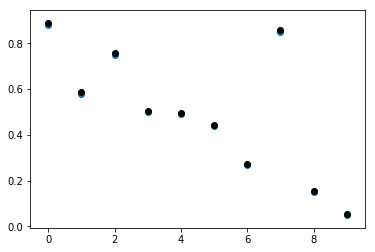

In [58]:
plt.scatter(range(10),y_test)
plt.scatter(range(10),y_pred,c='k')
plt.show()

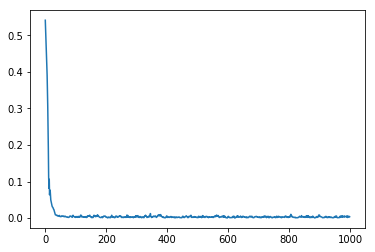

In [59]:
plt.plot(train_pred.history['loss'])

In [60]:
a=[[[44],[45],[46],[47],[48]]]
a=np.array(a,dtype=float)
a

array([[[44.],
        [45.],
        [46.],
        [47.],
        [48.]]])

In [61]:
a.reshape(-1,5,1)
a=a/100
a

array([[[0.44],
        [0.45],
        [0.46],
        [0.47],
        [0.48]]])

In [63]:
model.predict(a)*100

array([[49.521942]], dtype=float32)